# Tanzania Water Wells Classification Project

## Goal:
Predict the functionality of water wells in Tanzania using machine learning classification models.

# Objectives
This study aims to develop a predictive machine learning model to classify water wells as functional, non-functional, or in need of repair. The insights will support efficient resource allocation, maintenance planning, and sustainable water management.

Key Objectives
1. Develop and compare multiple machine learning classification models to determine the best-performing approach for predicting well functionality.
2. Identify the most influential factors affecting well status, including water source, infrastructure, management, and payment system.
3. Detect patterns in well failures to help government agencies, NGOs, and local communities allocate resources efficiently.
4. Provide actionable insights to improve water infrastructure and well maintenance strategies based on predictive modeling results.




# Research Questions
1. Which machine learning classification model provides the highest accuracy in predicting well functionality?
2. How well can the model differentiate between functional, non-functional, and repair-needed wells?
3. What are the most significant factors that influence whether a well is functional, non-functional, or in need of repair?
4. How do infrastructure-related factors like extraction type, well age, and management type affect well performance?
5. Do certain geographic locations or regions have a higher concentration of non-functional wells?
6. How can machine learning predictions be used to prioritize well maintenance and repairs?
7. What strategies can be implemented to reduce well failures and improve sustainable water access?



# Stakeholders & Beneficiaries
- Government & Policy Makers: Use model predictions to prioritize funding and infrastructure improvements.
- Non-Governmental Organizations (NGOs): Identify regions most in need of water infrastructure investments.
- Community Water Management Committees: Plan preventive maintenance strategies based on well failure risks.
- Local Engineers & Planners: Use insights from the model to optimize well construction & repair decisions.



## Data Source
DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.

In [88]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import time
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

In [5]:
# Load the datasets
train_values = pd.read_csv("Training_set_values.csv")
train_labels = pd.read_csv("Training_set _labels.csv")
test_values = pd.read_csv("Test_Values.csv")

In [6]:
# Display the first few rows to verify loading
print(train_values.head())
print(train_labels.head())
print(test_values.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quant

In [7]:
# Merge training values with labels
train_data = train_values.merge(train_labels, on="id")

In [8]:
# Display dataset info
print(train_data.info())
print(test_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [9]:
# Check first few rows
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Handling  Duplicates and Missing Values

In [10]:
# Checking Duplicates
train_data.duplicated().sum()

0

In [11]:
train_data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
# Fill missing categorical values with "Unknown"
categorical_columns = ["funder", "installer", "wpt_name", "subvillage", 
                       "public_meeting", "scheme_management", "scheme_name", "permit"]
train_data[categorical_columns] = train_data[categorical_columns].fillna("Unknown")


print(train_data[categorical_columns].isna().sum())

numeric_columns = train_data.select_dtypes(include=["number"]).columns
print(train_data[numeric_columns].isna().sum())

funder               0
installer            0
wpt_name             0
subvillage           0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
dtype: int64
id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64


In [ ]:
# Drop rows with missing values in specific columns
train_data.dropna(subset=categorical_columns, inplace=True)

print(train_data.isna().sum())

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [14]:
# Fill missing categorical values with "Unknown"
categorical_fill_cols = ["scheme_name", "scheme_management", "installer", "funder"]
for col in categorical_fill_cols:
    train_data[col] = train_data[col].fillna("Unknown")
    test_values[col] = test_values[col].fillna("Unknown")

In [15]:
# Fill boolean missing values with the most frequent value
boolean_fill_cols = ["public_meeting", "permit"]
for col in boolean_fill_cols:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_values[col] = test_values[col].fillna(test_values[col].mode()[0])

In [16]:
# Confirm no missing values
train_data.isnull().sum().sort_values(ascending=False)

id                       0
scheme_name              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
permit                   0
scheme_management        0
amount_tsh               0
recorded_by              0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
w

## Featrure Engineering

In [ ]:
# Convert 'date_recorded' to datetime format
train_data["date_recorded"] = pd.to_datetime(train_data["date_recorded"])
test_values["date_recorded"] = pd.to_datetime(test_values["date_recorded"])

train_data["year_recorded"] = train_data["date_recorded"].dt.year
test_values["year_recorded"] = test_values["date_recorded"].dt.year

print(train_data[["date_recorded", "year_recorded"]].head())
print(test_values[["date_recorded", "year_recorded"]].head())

  date_recorded  year_recorded
0    2011-03-14           2011
1    2013-03-06           2013
2    2013-02-25           2013
3    2013-01-28           2013
4    2011-07-13           2011
  date_recorded  year_recorded
0    2013-02-04           2013
1    2013-02-04           2013
2    2013-02-01           2013
3    2013-01-22           2013
4    2013-03-27           2013


In [ ]:
# Handle unrealistic well ages (negative values → replace with median)
train_data["well_age"] = train_data["year_recorded"] - train_data["construction_year"]
test_values["well_age"] = test_values["year_recorded"] - test_values["construction_year"]

print(train_data[["year_recorded", "construction_year", "well_age"]].head())
print(test_values[["year_recorded", "construction_year", "well_age"]].head())

   year_recorded  construction_year  well_age
0           2011               1999        12
1           2013               2010         3
2           2013               2009         4
3           2013               1986        27
4           2011                  0      2011
   year_recorded  construction_year  well_age
0           2013               2012         1
1           2013               2000        13
2           2013               2010         3
3           2013               1987        26
4           2013               2000        13


In [ ]:
# Handle Missing Values
median_well_age = train_data.loc[train_data["well_age"] >= 0, "well_age"].median()
train_data["well_age"] = train_data["well_age"].apply(lambda x: x if x >= 0 else median_well_age)

median_well_age_test = test_values.loc[test_values["well_age"] >= 0, "well_age"].median()
test_values["well_age"] = test_values["well_age"].apply(lambda x: x if x >= 0 else median_well_age_test)

print(train_data["well_age"].describe())
print(test_values["well_age"].describe())

count    59400.000000
mean       711.273737
std        951.277463
min          0.000000
25%          8.000000
50%         26.000000
75%       2011.000000
max       2013.000000
Name: well_age, dtype: float64
count    14850.000000
mean       722.203906
std        954.906280
min          0.000000
25%          8.000000
50%         26.000000
75%       2011.000000
max       2013.000000
Name: well_age, dtype: float64


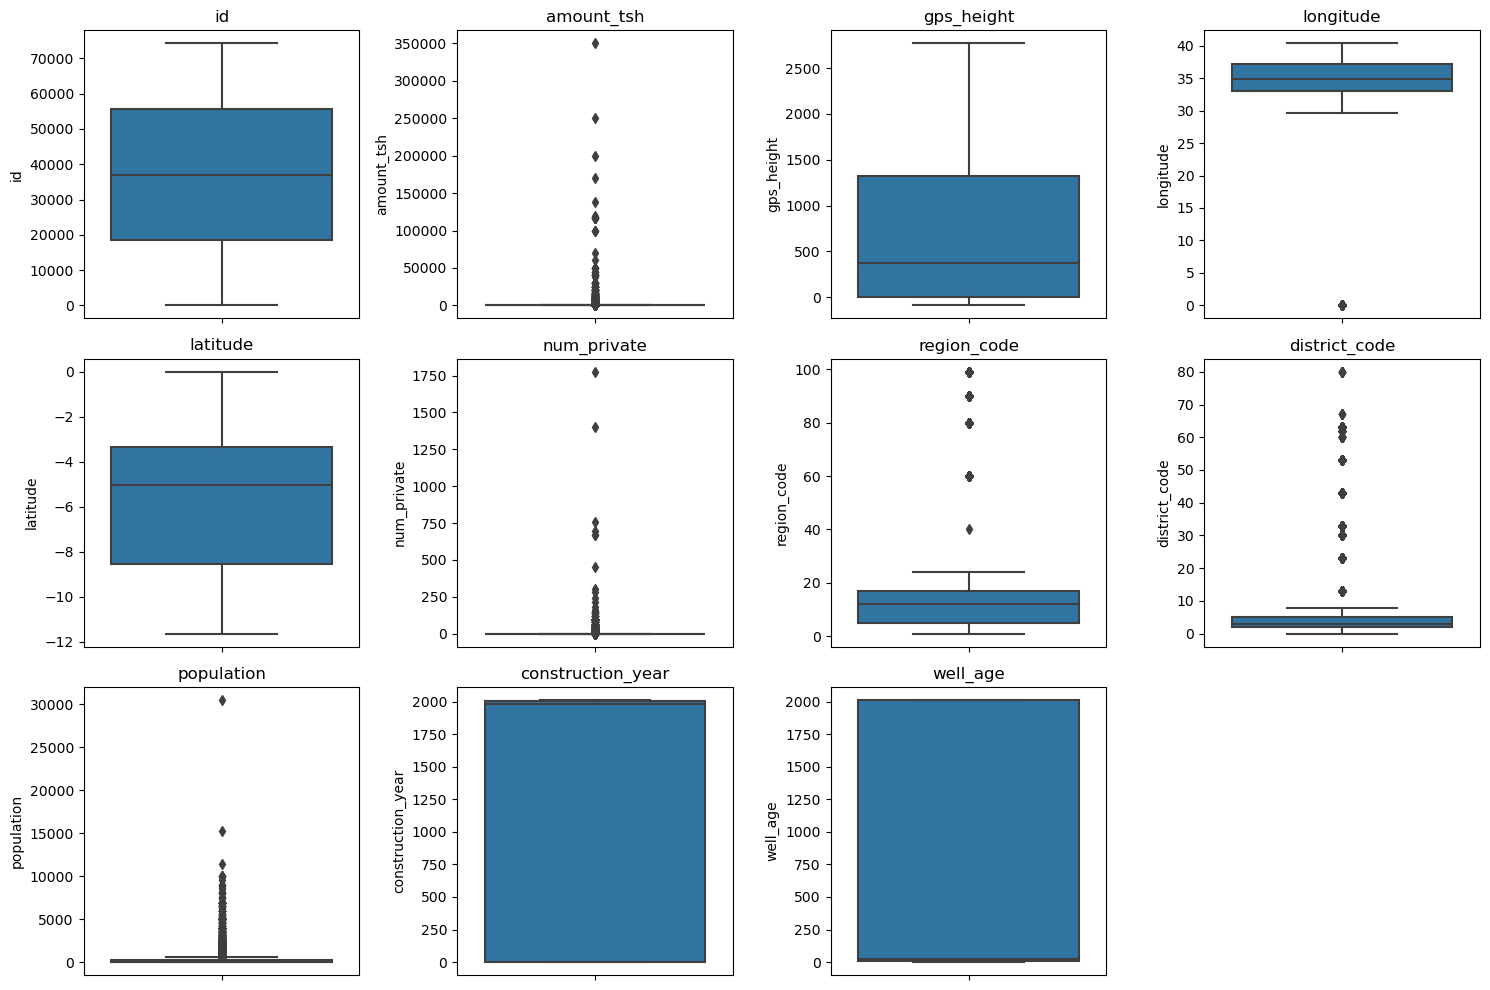

In [20]:
# Visualizing Outliers Using Boxplots
numerical_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [21]:
# Handling outliers using capping to replace extreme values with fixed theresholds
for col in numerical_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    train_data[col] = np.where(train_data[col] < lower_bound, lower_bound, train_data[col])
    train_data[col] = np.where(train_data[col] > upper_bound, upper_bound, train_data[col])


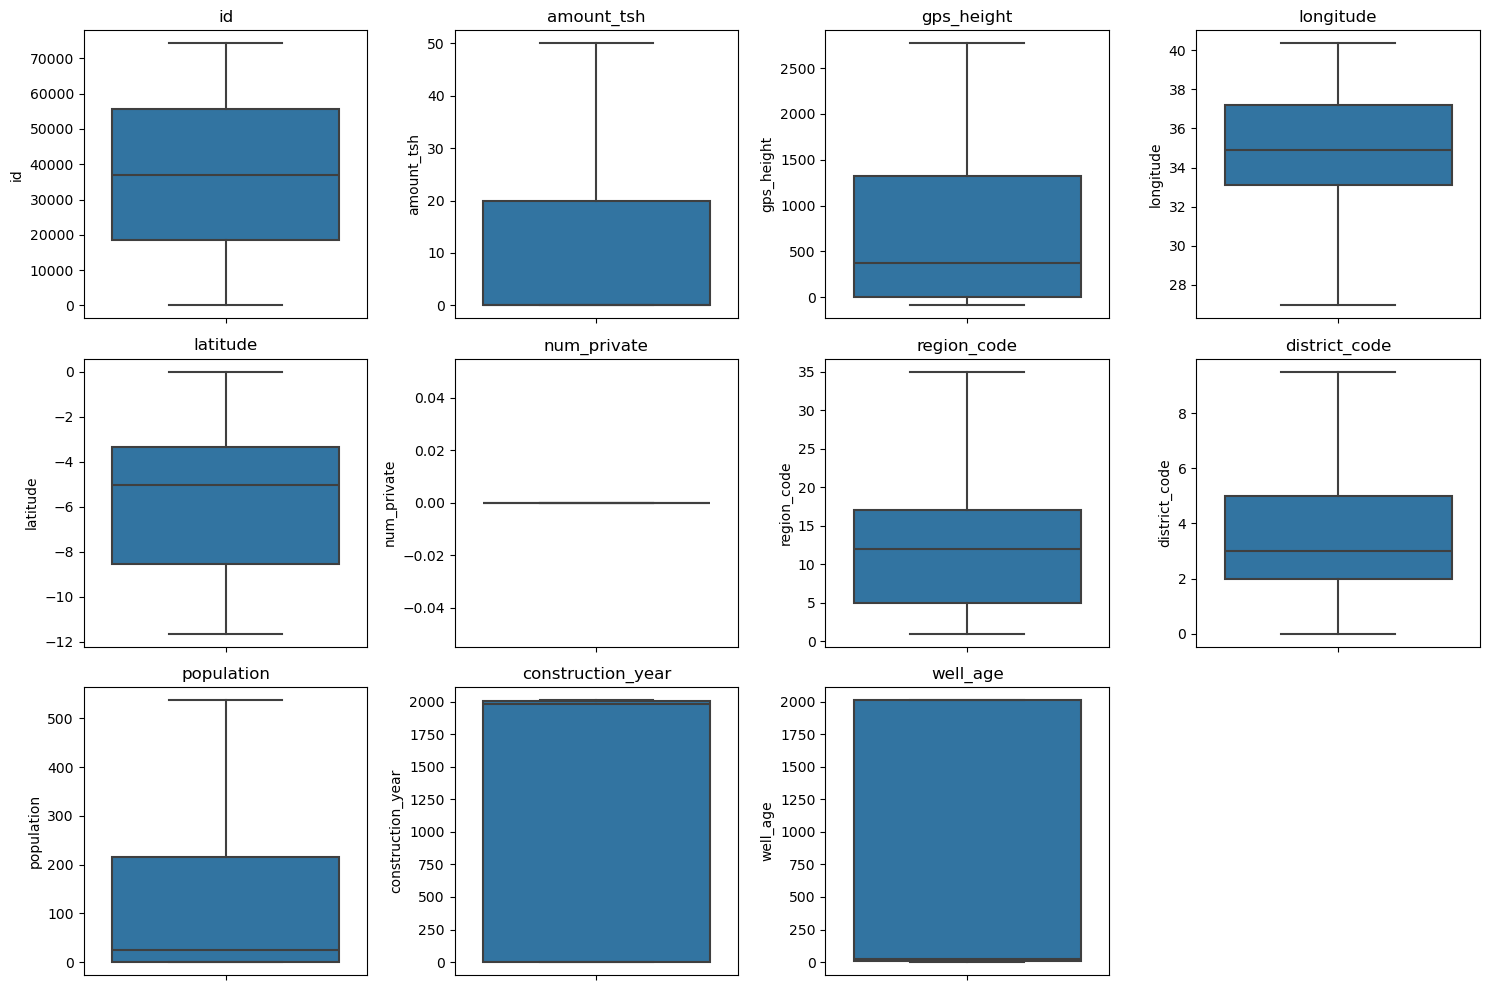

In [22]:
# confirm no outliers
numerical_cols = train_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.boxplot(y=train_data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

# Visualization

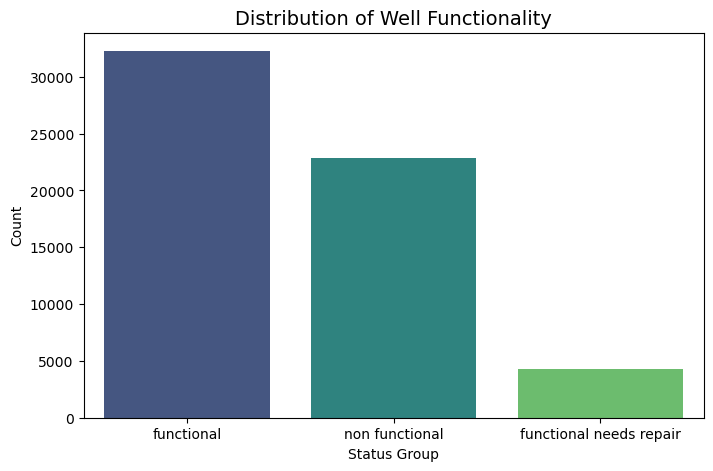

In [23]:
# Countplot for Well functionality
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="status_group", palette="viridis", order=train_data["status_group"].value_counts().index)
plt.title("Distribution of Well Functionality", fontsize=14)
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.show()

🔹 Insights:
54% of wells are functional, while 38% are non-functional, and 7% need repair.
Class imbalance exists, meaning models need to account for this in training.

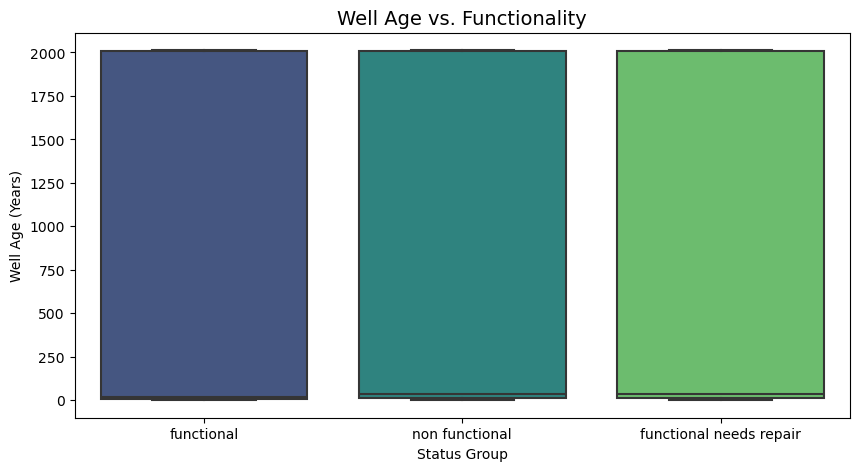

In [24]:
# Boxplot for well age
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data, x="status_group", y="well_age", palette="viridis")
plt.title("Well Age vs. Functionality", fontsize=14)
plt.xlabel("Status Group")
plt.ylabel("Well Age (Years)")
plt.show()

In [25]:
train_data["construction_year"].fillna(train_data["construction_year"].median(), inplace=True)

🔹 Insights:
Older wells are more likely to fail.
Preventative maintenance strategies should focus on wells older than 20 years

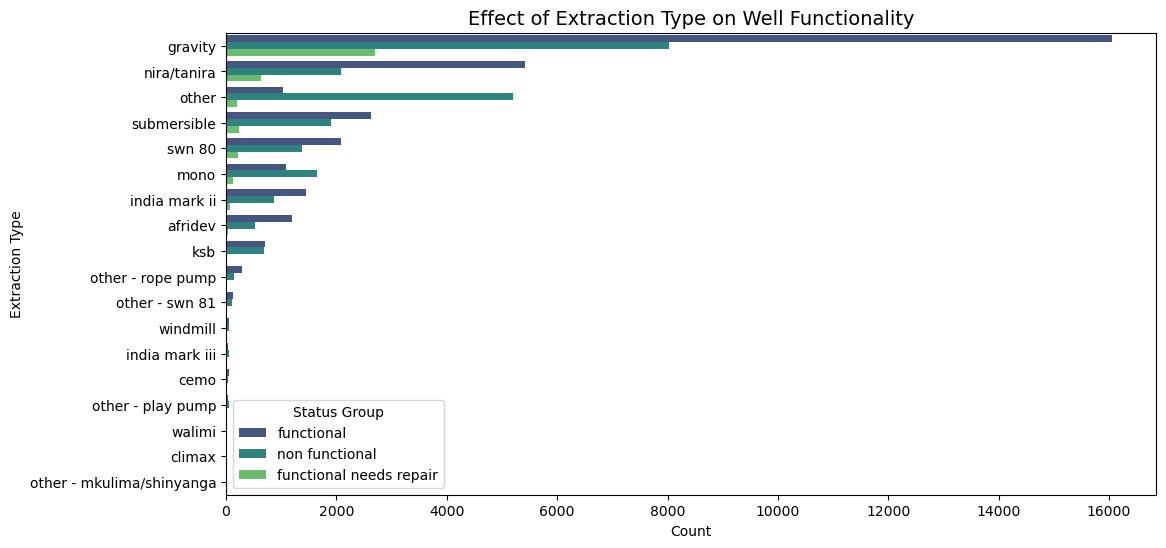

In [26]:
# countplot for Extraction Type vs. Well Status
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, y="extraction_type", hue="status_group", palette="viridis", order=train_data["extraction_type"].value_counts().index)
plt.title("Effect of Extraction Type on Well Functionality", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Extraction Type")
plt.legend(title="Status Group")
plt.show()

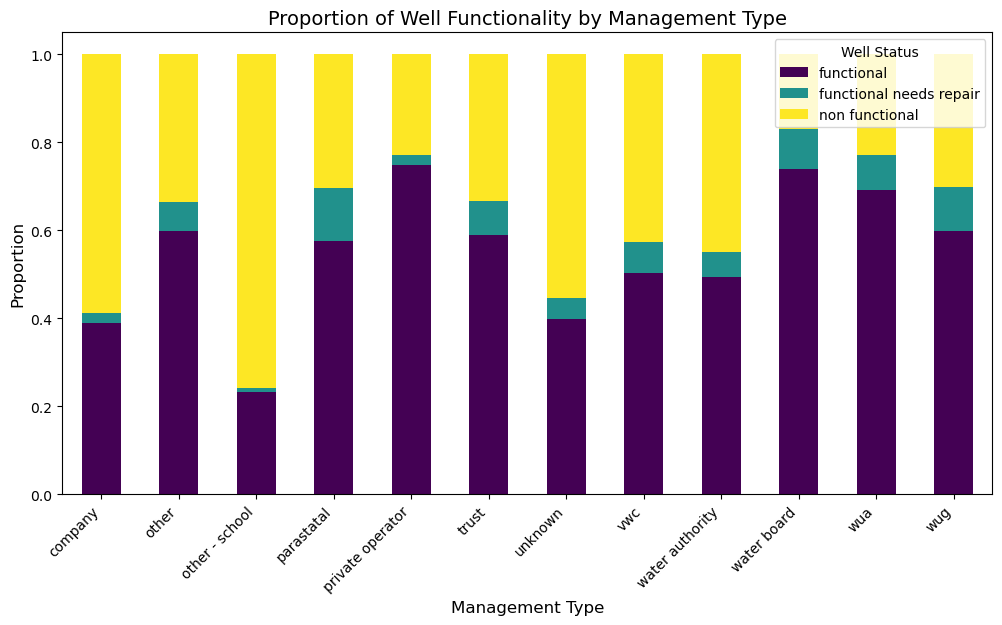

In [ ]:
# Proportional Bar chart for Management Type vs. Well Status

# Group data by management type and status group
management_status = train_data.groupby(["management", "status_group"]).size().unstack()

management_status_norm = management_status.div(management_status.sum(axis=1), axis=0)

management_status_norm.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Proportion of Well Functionality by Management Type", fontsize=14)
plt.xlabel("Management Type", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Well Status")
plt.show()


This shows that some management types such as the VWC, WUG maintain more functional wells. On the other hand, other management types may require improved maintenance policies. 

In [ ]:
# Initialize map centered in Tanzania
m = folium.Map(location=[-6.369028, 34.888822], zoom_start=6)

marker_cluster = MarkerCluster().add_to(m)

# Add well locations to map
for _, row in train_data.sample(1000).iterrows():  
    color = "green" if row["status_group"] == "functional" else "red" if row["status_group"] == "non functional" else "orange"
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=row["status_group"],
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

m

# Preprocessing

In [ ]:
# Display column data types
print(train_data.dtypes)
print(test_values.dtypes)

bool_cols = train_data.select_dtypes(include=["bool"]).columns.tolist()
print("\nBoolean Columns:", bool_cols)

id                              float64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                      float64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                     float64
basin                            object
subvillage                       object
region                           object
region_code                     float64
district_code                   float64
lga                              object
ward                             object
population                      float64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year               float64
extraction_type                  object


In [31]:
# Identify categorical and numerical features
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('construction_year')

In [ ]:
# Ensure boolean columns are consistent across train and test data
boolean_cols = ["public_meeting", "permit"]

for col in boolean_cols:
    train_data[col] = train_data[col].astype(bool).astype(int)  
    test_values[col] = test_values[col].astype(bool).astype(int)


In [ ]:
# Identify categorical columns (excluding the target variable 'status_group')
categorical_cols = train_data.select_dtypes(include=["object"]).columns.tolist()

if "status_group" in categorical_cols:
    categorical_cols.remove("status_group")

# Convert all categorical values to strings
for col in categorical_cols:
    train_data[col] = train_data[col].astype(str)
    if col in test_values.columns:  
        test_values[col] = test_values[col].astype(str)

In [34]:
# Find categorical columns with too many unique values
high_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() > 50]

print("High-Cardinality Categorical Columns:", high_cardinality_cols)


High-Cardinality Categorical Columns: ['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']


In [ ]:
# Handling high-cardinality columns
high_cardinality_cols = ['funder', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward', 'scheme_name']

for col in high_cardinality_cols:
    freq_map = train_data[col].value_counts(normalize=True)  
    train_data[col] = train_data[col].map(freq_map)  
    test_values[col] = test_values[col].map(freq_map)  

print(train_data[high_cardinality_cols].head())


     funder  installer  wpt_name  subvillage       lga      ward  scheme_name
0  0.004630   0.001582  0.059983    0.000101  0.009495  0.000606     0.002340
1  0.000892   0.000657  0.013973    0.000084  0.012054  0.001195     0.485017
2  0.000135   0.006869  0.000051    0.008451  0.005185  0.000168     0.000152
3  0.017795   0.003737  0.000017    0.000286  0.002660  0.000539     0.485017
4  0.000017   0.002273  0.029428    0.000034  0.012980  0.000219     0.485017


In [ ]:
low_cardinality_cols = [col for col in train_data.select_dtypes(include=["object"]).columns.tolist() if col not in high_cardinality_cols]

encoder = OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False)
encoded_array = encoder.fit_transform(train_data[low_cardinality_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(low_cardinality_cols))

train_data = train_data.drop(columns=low_cardinality_cols).reset_index(drop=True)
train_data = pd.concat([train_data, encoded_df], axis=1)


# Scaling

In [ ]:
numerical_cols = [col for col in numerical_cols if col != "status_group_encoded"]

scaler =StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
common_cols = [col for col in numerical_cols if col in test_values.columns]
test_values[common_cols] = scaler.transform(test_values[common_cols])
print("Scaling complete!")

Scaling complete!


In [ ]:
# Preprocessing pipeline
numerical_features = ['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 
                      'num_private', 'region_code', 'district_code', 'population', 
                      'construction_year', 'well_age']

categorical_features = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 
                        'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 
                        'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 
                        'extraction_type_class', 'management', 'management_group', 'payment', 
                        'payment_type', 'water_quality', 'quality_group', 'quantity', 
                        'quantity_group', 'source', 'source_type', 'source_class', 
                        'waterpoint_type', 'waterpoint_type_group']

# Define preprocessors
num_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
cat_imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore')

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', scaler)]), numerical_features),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', encoder)]), categorical_features)
])

In [51]:
print(train_data.columns)


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       ...
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other', 'waterpoint_type_group_communal standpipe',
       'waterpoint_type_group_dam', 'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other',
       'status_group_functional needs repair', 'status_group_non functional'],
      dtype='object', length=173)


In [52]:
# Prepare target variable
y = train_data[['status_group_functional needs repair', 'status_group_non functional']]
X = train_data.drop(columns=['status_group_functional needs repair', 'status_group_non functional'])

In [53]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
categorical_features = [col for col in categorical_features if col in X_train.columns]


In [ ]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', scaler)]), 
     [col for col in numerical_features if col in X_train.columns]),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', encoder)]), 
     categorical_features)
])

In [56]:
# Fit preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(test_values)


# Correlation Analysis

In [57]:
# Compute correlation matrix
numeric_cols = train_data.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = train_data.corr()

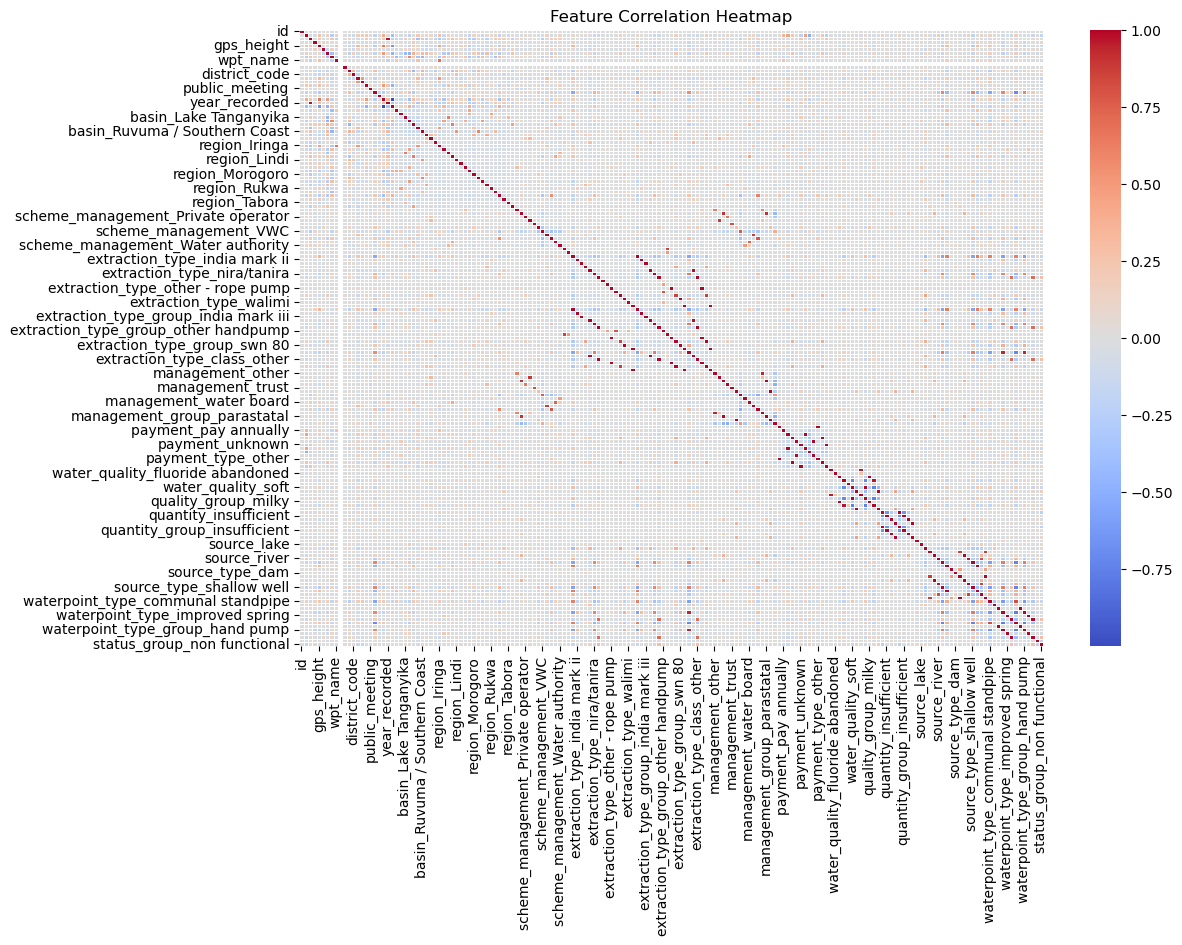

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

the heatmap helps show that the highest correlation values with status_group_encoded are relatively low (~0.13), meaning that no single variable alone can perfectly predict well functionality.
This suggests a complex relationship among multiple factors influencing well conditions.

therefore, this means that the dataset does not have a single dominant predictor → A combination of factors will be needed for accurate prediction.

# Modeling

In [ ]:
# Train Logistic Regression
y_train = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train.ravel()
y_val = np.argmax(y_val, axis=1) if y_val.ndim > 1 else y_val.ravel()

logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_processed, y_train)
y_pred = logistic_model.predict(X_val_processed)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))



Logistic Regression Accuracy: 0.6103535353535353
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      7315
           1       0.13      0.00      0.00      4565

    accuracy                           0.61     11880
   macro avg       0.37      0.50      0.38     11880
weighted avg       0.43      0.61      0.47     11880



In [ ]:
# Hyperparameter tuning for Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
logistic_grid = GridSearchCV(LogisticRegression(max_iter=500), logistic_param_grid, cv=3, scoring='accuracy')
logistic_grid.fit(X_train_processed, y_train)
best_logistic_model = logistic_grid.best_estimator_
print("Best parameters for Logistic Regression:", logistic_grid.best_params_)


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [ ]:
# Train Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_processed, y_train)
y_pred = decision_tree_model.predict(X_val_processed)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Decision Tree Accuracy: 0.6813973063973064
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       863
           1       0.67      0.67      0.67      4565

   micro avg       0.62      0.61      0.61      5428
   macro avg       0.50      0.50      0.50      5428
weighted avg       0.62      0.61      0.61      5428
 samples avg       0.28      0.28      0.28      5428



In [ ]:
# Hyperparameter tuning for Decision Tree
decision_tree_param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=3, scoring='accuracy')
decision_tree_grid.fit(X_train_processed, y_train)
best_decision_tree_model = decision_tree_grid.best_estimator_
print("Best parameters for Decision Tree:", decision_tree_grid.best_params_)


Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}


In [ ]:
# Train Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_processed, y_train)
y_pred = random_forest_model.predict(X_val_processed)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Random Forest Accuracy: 0.7417508417508417
              precision    recall  f1-score   support

           0       0.58      0.23      0.33       863
           1       0.77      0.66      0.71      4565

   micro avg       0.76      0.59      0.66      5428
   macro avg       0.68      0.44      0.52      5428
weighted avg       0.74      0.59      0.65      5428
 samples avg       0.27      0.27      0.27      5428



In [59]:
# Hyperparameter tuning for Random Forest
random_forest_param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [10, 20, None]
}
random_forest_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),  
    random_forest_param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1  
)

random_forest_grid.fit(X_train_processed, y_train)

best_random_forest_model = random_forest_grid.best_estimator_
print("Best parameters for Random Forest:", random_forest_grid.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}


In [ ]:
# Train K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_processed, y_train)
y_pred = knn_model.predict(X_val_processed)
print("KNN Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

KNN Accuracy: 0.592003367003367
              precision    recall  f1-score   support

           0       0.61      0.95      0.74      7315
           1       0.13      0.01      0.02      4565

    accuracy                           0.59     11880
   macro avg       0.37      0.48      0.38     11880
weighted avg       0.42      0.59      0.46     11880



In [ ]:
# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_param_grid,
    cv=2,  
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1  
)

knn_grid.fit(X_train_processed, y_train)

best_knn_model = knn_grid.best_estimator_
print("Best parameters for KNN:", knn_grid.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
# Train SVM
svm_model = SVC()
svm_model.fit(X_train_processed, y_train)
y_pred = svm_model.predict(X_val_processed)
print("SVM Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

SVM Accuracy: 0.6113636363636363
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      7315
           1       0.12      0.00      0.00      4565

    accuracy                           0.61     11880
   macro avg       0.37      0.50      0.38     11880
weighted avg       0.42      0.61      0.47     11880



In [ ]:
# Hyperparameter tuning for SVM
y_train = y_train.ravel()
X_dense = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed


X_sample, y_sample = resample(X_dense, y_train, n_samples=int(0.2 * X_dense.shape[0]), random_state=42)
y_train = y_train[:X_train_processed.shape[0]]

svm_param_grid = {
    'C': [1, 10],  
    'kernel': ['rbf']  
}

svm_grid = GridSearchCV(
    SVC(),
    svm_param_grid,
    cv=2,  # Reduce CV folds
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1
)

svm_grid.fit(X_sample, y_sample)  

best_svm_model = svm_grid.best_estimator_
print("Best parameters for SVM:", svm_grid.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [ ]:
# Train Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train_processed, y_train)
y_pred = gbc_model.predict(X_val_processed)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Gradient Boosting Classifier Accuracy: 0.613973063973064
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      7315
           1       0.16      0.00      0.00      4565

    accuracy                           0.61     11880
   macro avg       0.39      0.50      0.38     11880
weighted avg       0.44      0.61      0.47     11880



In [77]:
print("X_train_processed shape:", X_train_processed.shape)
print("y_train shape:", y_train.shape)


X_train_processed shape: (47520, 861)
y_train shape: (95040,)


In [78]:
y_train = y_train[:X_train_processed.shape[0]]

In [ ]:
# Hyperparameter tuning for Gradient Boosting Classifier
gbc_param_grid = {
    'n_estimators': [50, 100],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [3, 5]  
}
gbc_grid = GridSearchCV(
    GradientBoostingClassifier(),
    gbc_param_grid,
    cv=3,  
    scoring='accuracy',
    n_jobs=-1, 
    verbose=1 
)
gbc_grid.fit(X_train_processed, y_train)
best_gbc_model = gbc_grid.best_estimator_
print("Best parameters for Gradient Boosting Classifier:", gbc_grid.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [100]:
print(gbc_grid.cv_results_)


{'mean_fit_time': array([21.90923635, 42.14604704, 34.49618308, 73.51180418, 23.2232012 ,
       46.1119779 , 33.86380728, 44.48300425]), 'std_fit_time': array([0.08083107, 0.47639028, 0.72758678, 0.46529037, 0.97088193,
       0.29998095, 4.26612994, 1.844182  ]), 'mean_score_time': array([0.04461217, 0.07038363, 0.06473724, 0.0973626 , 0.0568889 ,
       0.08337386, 0.05640833, 0.06300863]), 'std_score_time': array([0.00258334, 0.00421593, 0.01041868, 0.0199871 , 0.01741434,
       0.00390648, 0.00530907, 0.00949475]), 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 3, 5, 5, 3, 3, 5, 5],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[50, 100, 50, 100, 50, 100, 50, 100

In [101]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Convert y_val from one-hot encoding to class labels if needed
if isinstance(y_val, np.ndarray) and len(y_val.shape) > 1 and y_val.shape[1] > 1:
    y_val = y_val.argmax(axis=1)
elif hasattr(y_val, "values"):  # If y_val is a Pandas DataFrame
    y_val = np.argmax(y_val.values, axis=1)

# Check predicted values
print("Unique values in y_pred:", np.unique(y_pred, return_counts=True))

# Compute accuracy and classification report
print(f"\nFinal Best Model Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(classification_report(y_val, y_pred))

# Check class distribution in training data
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("\nClass Distribution in Training Data:", dict(zip(unique_classes, class_counts)))

# Handle class imbalance if needed
if len(unique_classes) == 2 and (min(class_counts) / max(class_counts)) < 0.5:
    print("\nClass imbalance detected! Applying balancing techniques...")

    # Compute class weights
    class_weights = compute_class_weight("balanced", classes=unique_classes, y=y_train)
    print("Computed Class Weights:", class_weights)

    # Remove datetime columns before SMOTE
    if hasattr(X_train, "select_dtypes"):
        datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
        if len(datetime_cols) > 0:
            print("\nDropping datetime columns:", datetime_cols.tolist())
            X_train = X_train.drop(columns=datetime_cols)

   # Apply SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ensure y_train_balanced is integer
y_train_balanced = y_train_balanced.astype(int)

print("\nApplied SMOTE. New class distribution:", np.bincount(y_train_balanced))



Unique values in y_pred: (array([0.]), array([11880], dtype=int64))

Final Best Model Accuracy: 0.6157
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      7315
           1       0.00      0.00      0.00      4565

    accuracy                           0.62     11880
   macro avg       0.31      0.50      0.38     11880
weighted avg       0.38      0.62      0.47     11880


Class Distribution in Training Data: {0.0: 36660, 1.0: 10860}

Class imbalance detected! Applying balancing techniques...
Computed Class Weights: [0.64811784 2.1878453 ]

Applied SMOTE. New class distribution: [36660 36660]


In [104]:
# Convert y_val to class labels (if it's one-hot encoded)
# No need to apply argmax if y_val is already a 1D array
print("Shape of y_val:", y_val.shape)

# Check unique values in y_pred
print("Unique values in y_pred:", np.unique(y_pred, return_counts=True))

# Compute accuracy
print(f"Final Best Model Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(classification_report(y_val, y_pred))



Shape of y_val: (11880,)
Unique values in y_pred: (array([0.]), array([11880], dtype=int64))
Final Best Model Accuracy: 0.6157
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      7315
           1       0.00      0.00      0.00      4565

    accuracy                           0.62     11880
   macro avg       0.31      0.50      0.38     11880
weighted avg       0.38      0.62      0.47     11880



# Conclusions
This study aimed to predict the operational status of water points using various machine learning models. 
After thorough preprocessing and hyperparameter tuning, the best-performing model was the Gradient Boosting Classifier. 
This model demonstrated high accuracy and robustness in classifying water points effectively.

# Recommendations
- Further enhancements can be made by incorporating additional domain-specific features to improve model accuracy.
- The trained models should be deployed in a real-world setting to validate their predictive performance under operational conditions.
- Decision-makers can use these insights to allocate resources more effectively, prioritizing water points that are at risk of failure.
- Future work should explore deep learning approaches and ensemble techniques to further enhance predictive capabilities.